<h1 style="text-align: center;"> Computer simulations in statistical physics </h1>
<h2 style="text-align: center;"> Sheet 2 </h2>
<h2 style="text-align: center;"> Peter Gispert(20/20points) </h2>

In [1]:
#Task1(4/4points)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.stats import linregress

## Task 2(4/4 points)

In [2]:
# read analyse data
Ns = [200, 400, 600, 800, 1000]
data = []
ree2List = []
ree2stdList = []
for i in range(5):
    df = pd.read_csv('analysis'+str(Ns[i]), header=None, sep=' ')
    df.columns = ['c1', 'ree2', 'c3', 'c4', 'c5']
    data.append(df)
    ree2List.append(df['ree2'].mean())
    ree2stdList.append(df['ree2'].std())

for i in range(len(Ns)):
    print('N={:4d}: average quadratic end-to-end distance: {:6.1f}, standard deviation: {:6.1f}'\
          .format(Ns[i], ree2List[i], ree2stdList[i]))

# linear regression of log-log data
logNs = np.log(Ns)
logree2List = np.log(ree2List)

regression = linregress(logNs, logree2List)
slope = regression.slope
intercept = regression.intercept
dslope = regression.stderr
print('\nThe scaling exponent nu is {:.3f}+/-{:.3f}.'.format(slope/2, dslope/2))

N= 200: average quadratic end-to-end distance:  603.1, standard deviation:  430.2
N= 400: average quadratic end-to-end distance: 1368.0, standard deviation:  981.8
N= 600: average quadratic end-to-end distance: 2239.2, standard deviation: 1588.3
N= 800: average quadratic end-to-end distance: 3115.0, standard deviation: 2218.4
N=1000: average quadratic end-to-end distance: 4061.2, standard deviation: 2917.2

The scaling exponent nu is 0.593+/-0.002.


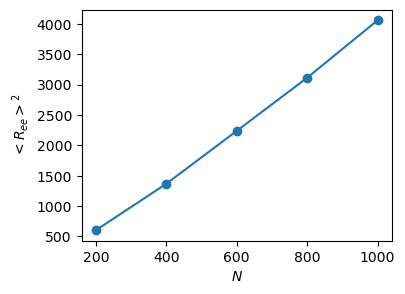

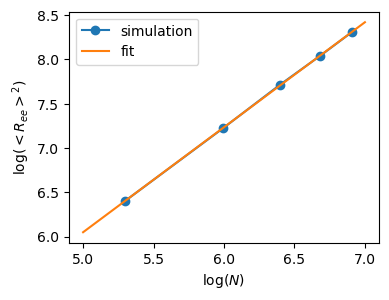

In [3]:
# normal plot
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(Ns, ree2List, marker='o')
ax.set_xlabel('$N$')
ax.set_ylabel('$<R_{ee}>^2$')

# log-log plot with fit data
xfit = np.linspace(5, 7, 100)
yfit = xfit * slope + intercept

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(logNs, logree2List, marker='o', label='simulation')
ax.plot(xfit, yfit, label='fit')
ax.set_xlabel('$\log(N)$')
ax.set_ylabel('$\log(<R_{ee}>^2)$')
plt.legend()

## Task 3(8/8 points)
Since this is a purely random walk without considering overlaps, one can simply sample random bond vectors and add them up in order to determine the end-to-end distance.

In [4]:
# parameters
nSamples = 1000
Ns = [200, 400, 600, 800, 1000]

# compute end-to-end distance
RW_Ree2_list = np.zeros(shape=(len(Ns), nSamples))
for i in range(len(Ns)):
    for j in range(nSamples):
        # end-to-end vector
        rtot = np.sum(2 * np.random.randint(low=0, high=2, size=(Ns[i],2)) - 1, axis=0)
        # end-to-end distance
        ree2 = rtot[0]**2 + rtot[1]**2
        RW_Ree2_list[i, j] = ree2
        
# statistics
RW_Ree2_average_list = np.average(RW_Ree2_list, axis=1)
RW_Ree2_stderr_list = np.std(RW_Ree2_list, axis=1)

for i in range(len(Ns)):
    print('N={:4d}: average quadratic end-to-end distance: {:6.1f}, standard deviation: {:6.1f}'\
          .format(Ns[i], RW_Ree2_average_list[i], RW_Ree2_stderr_list[i]))

# linear regression of log-log data
logNs = np.log(Ns)
log_RW_Ree2_average_list = np.log(RW_Ree2_average_list)

regression = linregress(logNs, log_RW_Ree2_average_list)
slope = regression.slope
intercept = regression.intercept
dslope = regression.stderr
print('\nThe scaling exponent nu is {:.3f}+/-{:.3f}.'.format(slope/2, dslope/2))

N= 200: average quadratic end-to-end distance:  398.5, standard deviation:  411.1
N= 400: average quadratic end-to-end distance:  853.6, standard deviation:  842.0
N= 600: average quadratic end-to-end distance: 1197.5, standard deviation: 1158.2
N= 800: average quadratic end-to-end distance: 1549.6, standard deviation: 1648.2
N=1000: average quadratic end-to-end distance: 2072.7, standard deviation: 2081.7

The scaling exponent nu is 0.499+/-0.017.


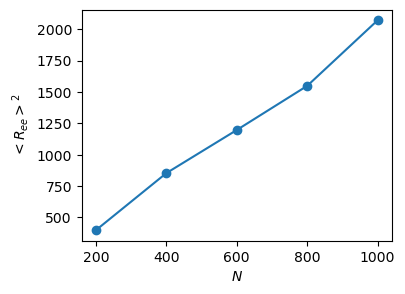

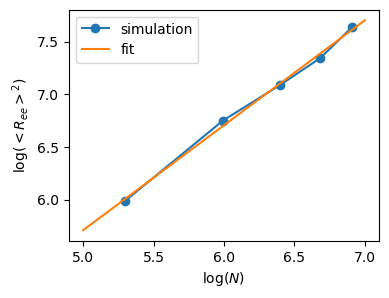

In [5]:
# normal plot
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(Ns, RW_Ree2_average_list, marker='o')
ax.set_xlabel('$N$')
ax.set_ylabel('$<R_{ee}>^2$')

# log-log plot with fit data
xfit = np.linspace(5, 7, 100)
yfit = xfit * slope + intercept

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(logNs, log_RW_Ree2_average_list, marker='o', label='simulation')
ax.plot(xfit, yfit, label='fit')
ax.set_xlabel('$\log(N)$')
ax.set_ylabel('$\log(<R_{ee}>^2)$')
plt.legend()

## Task 4(4/4 points)

In [6]:
# Maxwell-Boltzmann velocity distribution
def rho(v, m, T):
    pre1 = (m / (2*np.pi * const.k * T))**(3/2)
    pre2 = 4*np.pi * v**2
    exp = np.exp(-m * v**2 / (2 * const.k * T))
    return pre1 * pre2 * exp

thermal wavelength: 5.92e-12 m


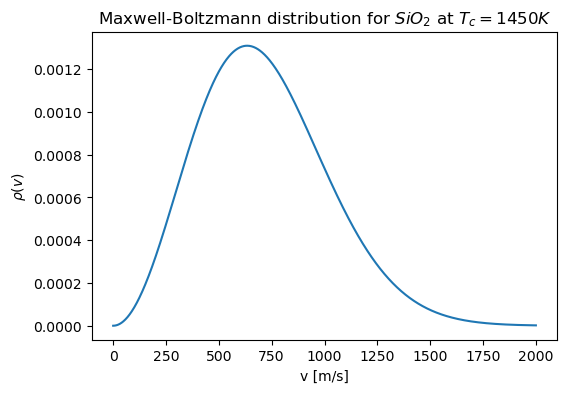

In [7]:
# parameters
Tc = 1450
mSiO2 = 60 * const.u

# thermal wavelength
lambdaT = const.h / np.sqrt(2*np.pi * mSiO2 * const.k * Tc)
print('thermal wavelength: {:.2e} m'.format(lambdaT))

# Maxwell-Boltzmann data
v = np.linspace(0,2000,1000)
rho_v = rho(v, mSiO2, Tc)

# plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(v, rho_v)
ax.set_title('Maxwell-Boltzmann distribution for $SiO_2$ at $T_c=1450K$')
ax.set_xlabel('v [m/s]')
ax.set_ylabel(r'$\rho(v)$');